In [2]:
#Author: Aaron Hertner
#Version: Python Base 3.8
#Purpose: To test and demonstrate the different methods of neural net learning

In [3]:
#test models
#MLP Regressor -> MLP Classifier
#MLP is sensitive to scale, standardize features using StandardScaler before training and testing

#test alpha values

#test training algorithms
#Stochastic Gradient Descent -> Adam -> L-BFGS

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

#models
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans

In [5]:
data_raw = pd.read_csv('../_datasets/mushrooms.csv')

pd.options.display.max_columns = None
data_raw.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
le = LabelEncoder()

df = pd.DataFrame(le.fit_transform(data_raw['class']), columns = ['class'])

for col in data_raw.columns:
    X = pd.DataFrame(le.fit_transform(data_raw[col]), columns = [col])
    df[col] = X
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [7]:
sc = StandardScaler(with_std = True)
Y = df['class']
X = df.drop(['class'], axis=1)
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

df = pd.DataFrame(X, columns = X.columns)
df['class'] = Y

df_SC_cpy = df
    
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028,1
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730,0
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149,0
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028,1
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730,0


In [8]:
print(df.shape)

(8124, 23)


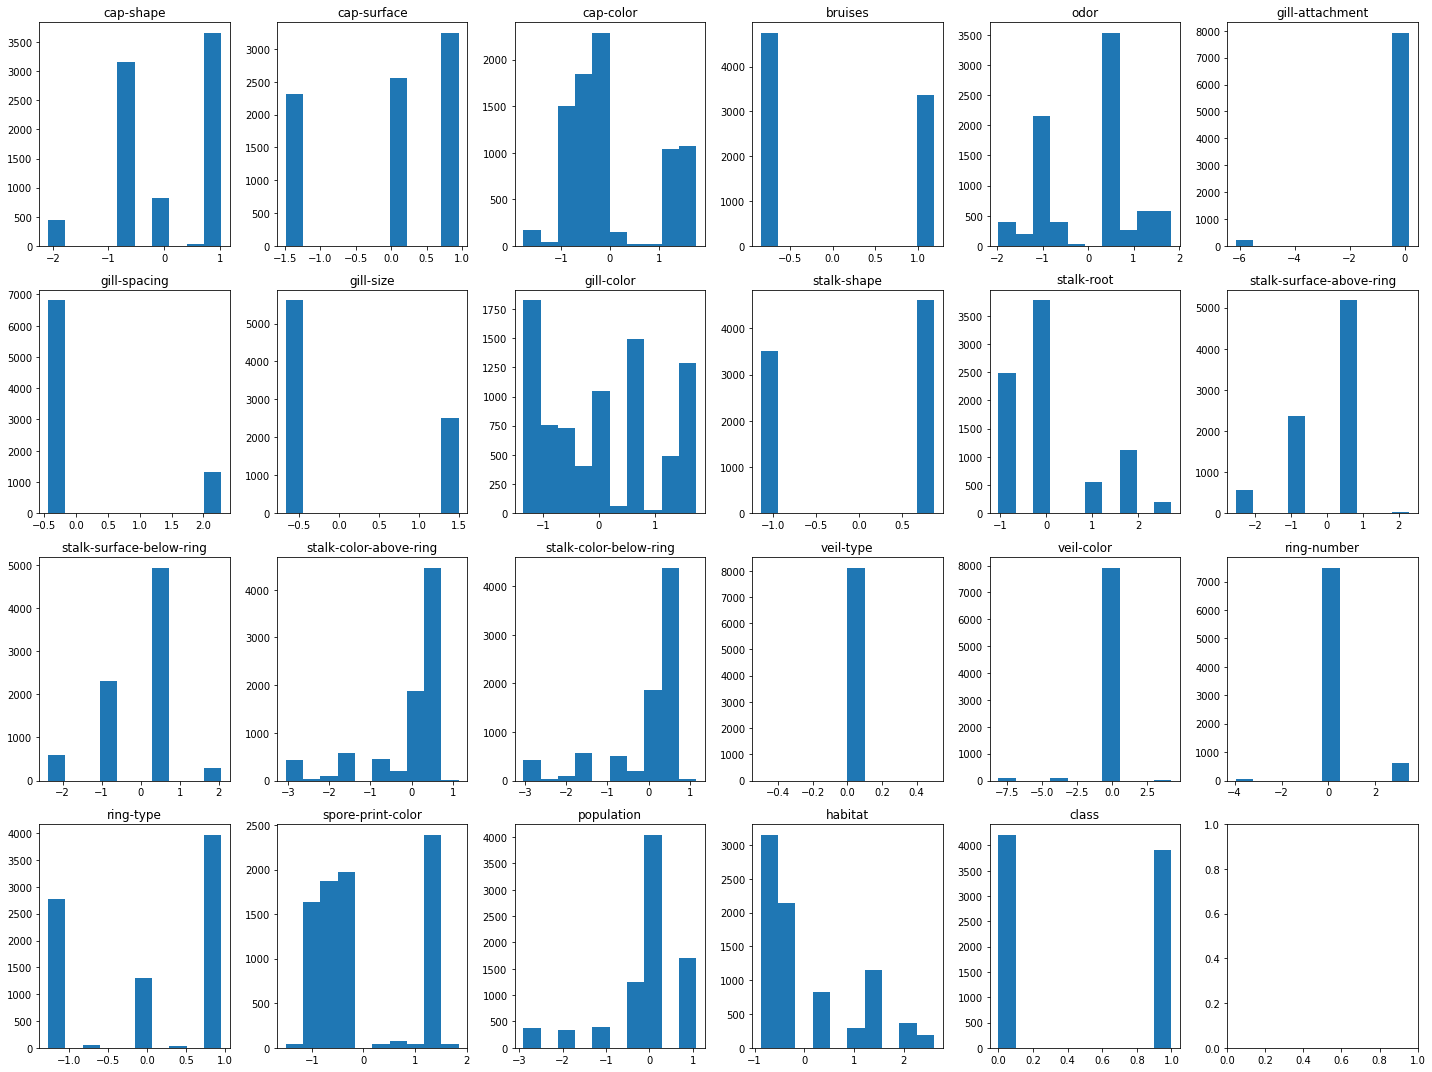

In [9]:
def plot_hist(df):
    fig, axarr = plt.subplots(4,6, figsize=(20,15))
    i = 0
    for col in df.columns:
        axarr[i//6][i%6].hist(df[col])
        axarr[i//6][i%6].set_title(col)
        i += 1

    plt.tight_layout()
    
plot_hist(df = df)

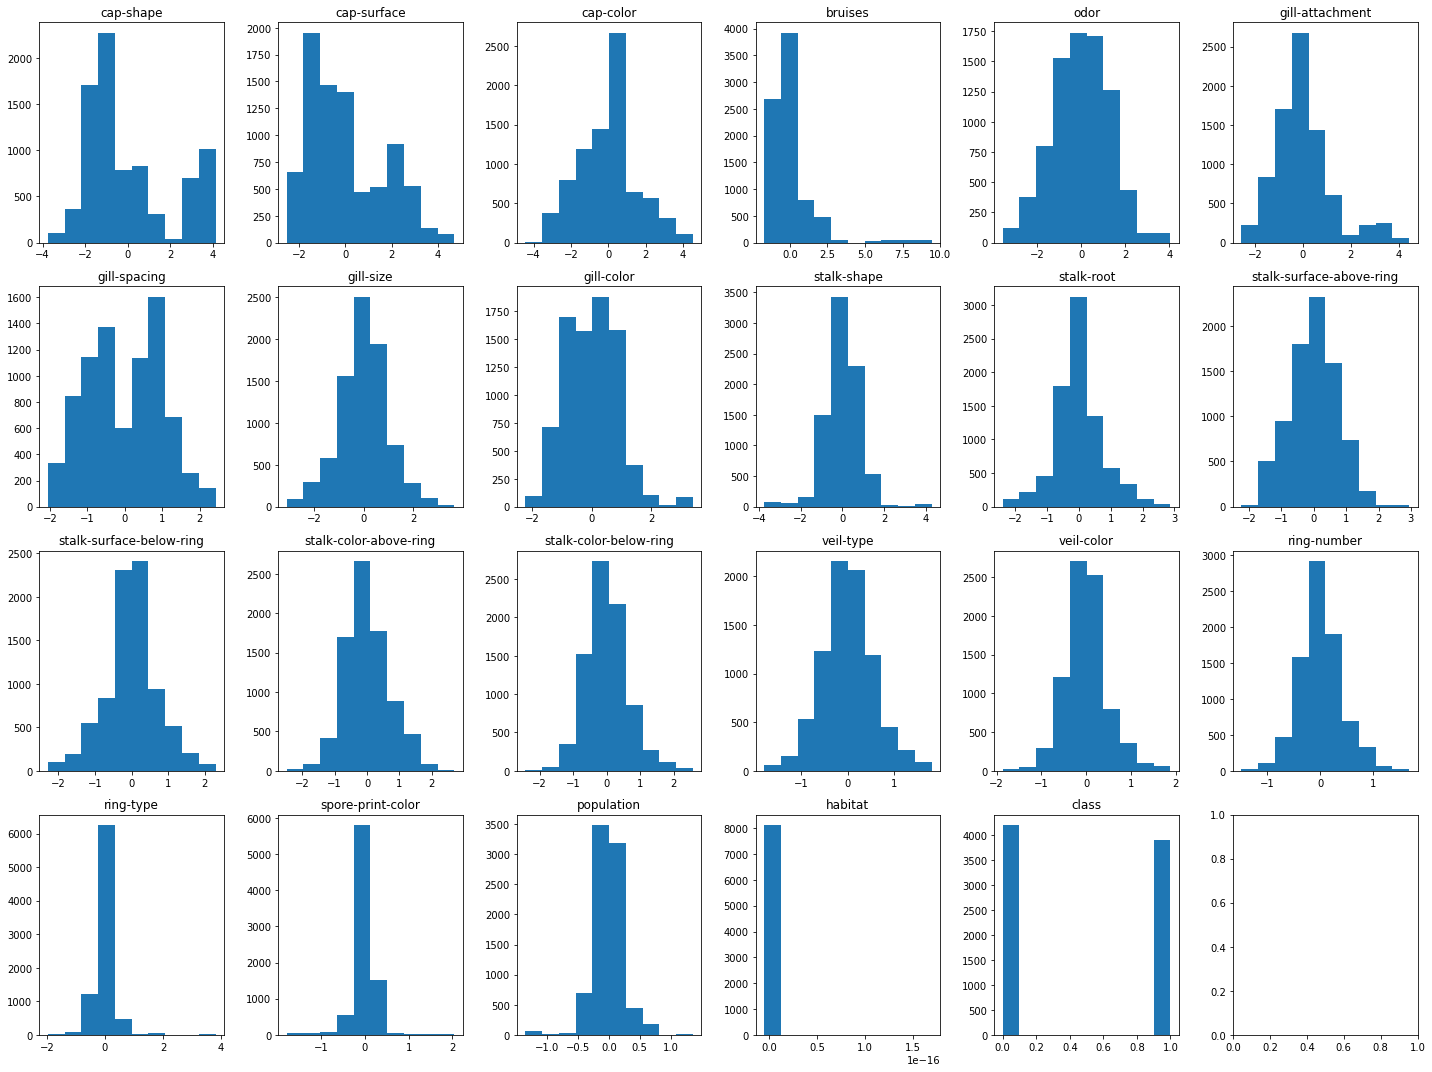

In [10]:
Y = df['class']
X = df.drop(['class'], axis=1)

pc = PCA()
df = pd.DataFrame(pc.fit_transform(X), columns = X.columns)
df['class'] = Y

plot_hist(df = df)

In [11]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966,-0.782544,1.120259,-0.004570,-0.359782,-0.208581,0.008140,-1.066114e-18,1
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078,-0.730934,-0.018174,0.366562,0.278532,0.152239,-0.196446,2.916032e-18,0
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,-0.511113,-0.033061,-0.519470,0.016525,-0.656167,0.107914,-0.181087,0.364882,0.257582,-0.362577,1.293587e-18,0
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1.213600,0.434106,0.025716,-0.059661,-0.454026,0.994198,-0.082612,-0.393285,-0.169119,0.157344,1.198193e-18,1
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,-1.260035,-0.682285,0.517256,-0.514080,0.242658,-0.311933,-0.587410,-0.159598,0.167047,0.061573,-4.360225e-19,0


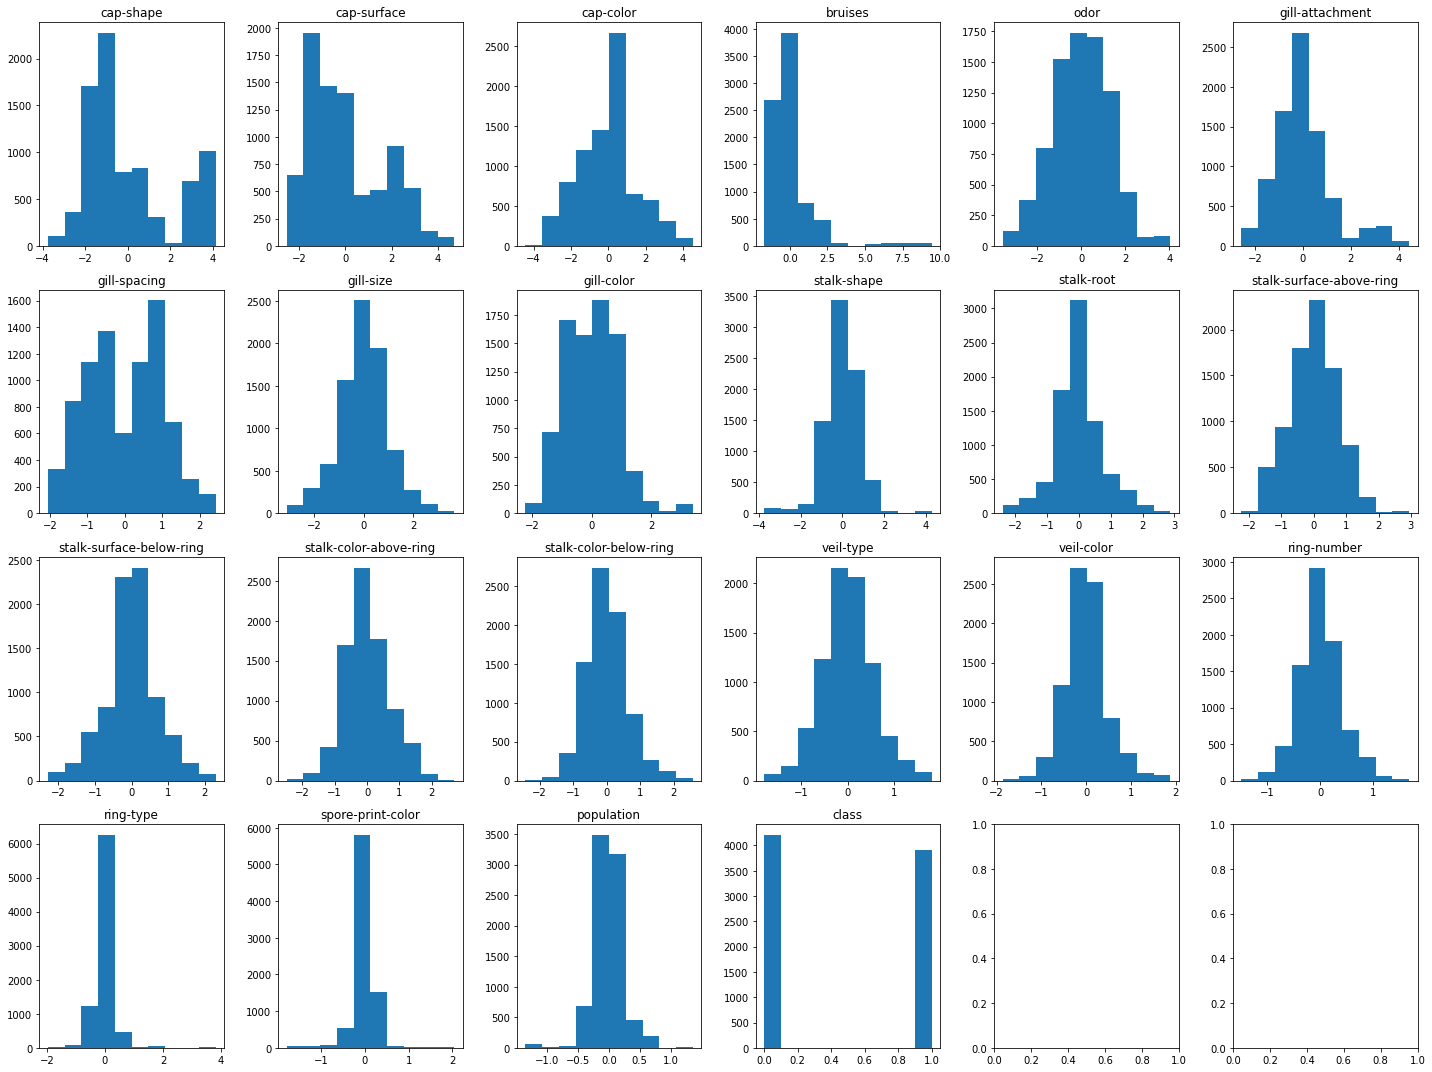

In [12]:
df = df.drop(['habitat'], axis=1)

plot_hist(df = df)

In [13]:
Y, X = df['class'], df.drop(['class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print(f'Training Set: {x_train.shape} | Testing Set: {x_test.shape}')

solvers = ['lbfgs','sgd','adam']
alphas = [0.3, 0.9, 1.5, 3.0]

print('MLP Classifier: -------------------------------------------------------')
for solver in solvers:
    for alpha in alphas:
        clf = MLPClassifier(solver = solver, alpha = alpha, random_state = 1, 
                            max_iter = 2000, early_stopping = True, hidden_layer_sizes = [100,100])
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        print(f'Solver: {solver} | Alpha: {alpha} | Score: {score}')
        
print('MLP Regressor: -------------------------------------------------------')
for solver in solvers:
    for alpha in alphas:
        clf = MLPRegressor(solver = solver, alpha = alpha, random_state = 1, 
                            max_iter = 2000, early_stopping = True, hidden_layer_sizes = [100,100])
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        print(f'Solver: {solver} | Alpha: {alpha} | Score: {score}')

Training Set: (6499, 21) | Testing Set: (1625, 21)
MLP Classifier: -------------------------------------------------------
Solver: lbfgs | Alpha: 0.3 | Score: 1.0
Solver: lbfgs | Alpha: 0.9 | Score: 1.0
Solver: lbfgs | Alpha: 1.5 | Score: 1.0
Solver: lbfgs | Alpha: 3.0 | Score: 1.0
Solver: sgd | Alpha: 0.3 | Score: 0.9846153846153847
Solver: sgd | Alpha: 0.9 | Score: 0.9852307692307692
Solver: sgd | Alpha: 1.5 | Score: 0.9852307692307692
Solver: sgd | Alpha: 3.0 | Score: 0.9790769230769231
Solver: adam | Alpha: 0.3 | Score: 0.9975384615384615
Solver: adam | Alpha: 0.9 | Score: 0.9987692307692307
Solver: adam | Alpha: 1.5 | Score: 0.9993846153846154
Solver: adam | Alpha: 3.0 | Score: 0.9969230769230769
MLP Regressor: -------------------------------------------------------
Solver: lbfgs | Alpha: 0.3 | Score: 0.9999128945922591
Solver: lbfgs | Alpha: 0.9 | Score: 0.9998717654685946
Solver: lbfgs | Alpha: 1.5 | Score: 0.9998595277576441
Solver: lbfgs | Alpha: 3.0 | Score: 0.999523949443728

In [14]:
clf = MLPRegressor(solver = 'lbfgs', alpha = 0.3, random_state = 1, 
                   max_iter = 2000)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

print('MLPRegressor, lbfgs solver, 0.3 Alpha----------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

MLPRegressor, lbfgs solver, 0.3 Alpha----------------------------------------------------------
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



N-Clusters : 3
Inertia   : 100306.0907525092
Silhouette: 0.23072038763645608

N-Clusters : 4
Inertia   : 87358.96666314872
Silhouette: 0.26637855826826

N-Clusters : 5
Inertia   : 78253.25462835362
Silhouette: 0.306532723543589



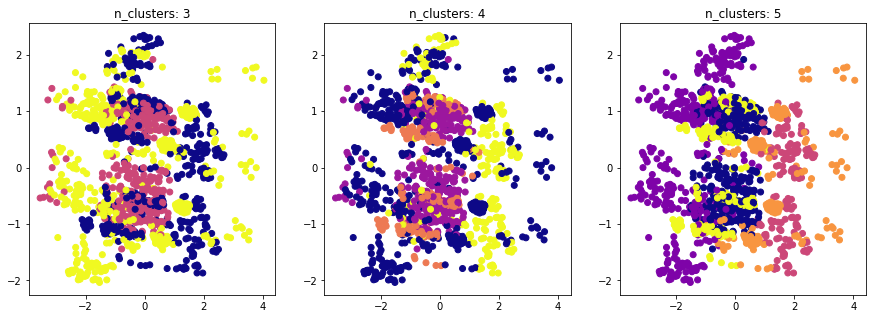

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

lowerbound = 3
for i in range(lowerbound,6):
    k_means = KMeans(n_clusters = i, n_init = 4)
    k_means.fit(x_train)
    y_pred = k_means.predict(x_test)
    plot_data = pd.DataFrame(np.c_[x_test,y_pred])
    ax[i-lowerbound].scatter(plot_data[4], plot_data[6], c=y_pred, cmap=plt.cm.get_cmap('plasma'))
    ax[i-lowerbound].set_title(f'n_clusters: {i}')
    print(f'N-Clusters : {i}')
    print(f'Inertia   : {k_means.inertia_}')
    print(f'Silhouette: {silhouette_score(x_test, y_pred)}\n')

In [16]:
Y, X = df_SC_cpy['class'], df_SC_cpy.drop(['class'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

clf = MLPRegressor(solver = 'lbfgs', alpha = 3, random_state = 1, 
                   max_iter = 2000)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



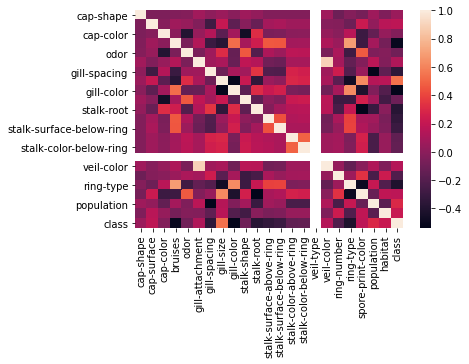

In [17]:
sb.heatmap(df_SC_cpy.corr())

In [18]:
Y, X = df['class'], df[['odor', 'cap-shape']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print(f'Training Set: {x_train.shape} | Testing Set: {x_test.shape}')

solvers = ['lbfgs','sgd','adam']
alphas = [0.3, 0.9, 1.5, 3.0]

print('MLP Classifier: -------------------------------------------------------')
for solver in solvers:
    for alpha in alphas:
        clf = MLPClassifier(solver = solver, alpha = alpha, random_state = 1, 
                            max_iter = 10000, early_stopping = True, hidden_layer_sizes = [100,100])
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        print(f'Solver: {solver} | Alpha: {alpha} | Score: {score}')
        
print('MLP Regressor: -------------------------------------------------------')
for solver in solvers:
    for alpha in alphas:
        clf = MLPRegressor(solver = solver, alpha = alpha, random_state = 1, 
                            max_iter = 10000, early_stopping = True, hidden_layer_sizes = [100,100])
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)

        print(f'Solver: {solver} | Alpha: {alpha} | Score: {score}')

Training Set: (6499, 2) | Testing Set: (1625, 2)
MLP Classifier: -------------------------------------------------------
Solver: lbfgs | Alpha: 0.3 | Score: 0.9396923076923077
Solver: lbfgs | Alpha: 0.9 | Score: 0.9415384615384615
Solver: lbfgs | Alpha: 1.5 | Score: 0.9378461538461539
Solver: lbfgs | Alpha: 3.0 | Score: 0.9341538461538461
Solver: sgd | Alpha: 0.3 | Score: 0.8707692307692307
Solver: sgd | Alpha: 0.9 | Score: 0.8584615384615385
Solver: sgd | Alpha: 1.5 | Score: 0.8707692307692307
Solver: sgd | Alpha: 3.0 | Score: 0.8707692307692307
Solver: adam | Alpha: 0.3 | Score: 0.9187692307692308
Solver: adam | Alpha: 0.9 | Score: 0.92
Solver: adam | Alpha: 1.5 | Score: 0.9150769230769231
Solver: adam | Alpha: 3.0 | Score: 0.9156923076923077
MLP Regressor: -------------------------------------------------------
Solver: lbfgs | Alpha: 0.3 | Score: 0.8194395433834797
Solver: lbfgs | Alpha: 0.9 | Score: 0.8138970354529339
Solver: lbfgs | Alpha: 1.5 | Score: 0.8081158203326938
Solver: l

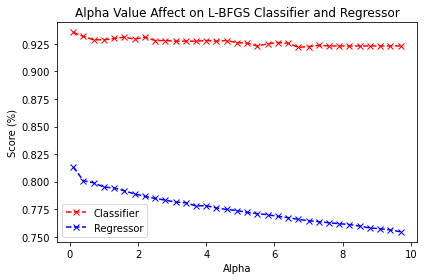

In [26]:
Y, X = df['class'], df[['odor', 'cap-shape']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

x_range = np.arange(0.1, 10.0, 0.3)
scores_clf = []
scores_reg = []

for alpha in x_range:
    clf = MLPClassifier(solver='lbfgs', alpha = alpha, random_state=0, max_iter = 10000, early_stopping = True)
    reg = MLPRegressor(solver='lbfgs', alpha = alpha, random_state=0, max_iter = 10000, early_stopping = True)
    
    clf.fit(x_train, y_train)
    reg.fit(x_train, y_train)
    
    score_clf = clf.score(x_test, y_test)
    score_reg = reg.score(x_test, y_test)
    
    scores_clf.append(score_clf)
    scores_reg.append(score_reg)
    
plt.title('Alpha Value Affect on L-BFGS Classifier and Regressor')
plt.xlabel('Alpha')
plt.ylabel('Score (%)')
plt.plot(x_range, scores_clf, c='r', label='Classifier', marker='x', linestyle = '--')
plt.plot(x_range, scores_reg, c='b', label='Regressor', marker='x', linestyle = '--')
plt.legend()
plt.tight_layout()

[[792  28]
 [ 71 734]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       820
           1       0.96      0.91      0.94       805

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



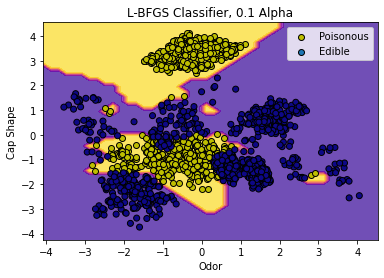

In [30]:
feat1, feat2 = 'odor', 'cap-shape'

Y, X = df['class'], df[[feat1, feat2]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

clf = MLPClassifier(solver = 'lbfgs', alpha = 0.1, random_state = 1, 
                   max_iter = 5000)
clf.fit(x_train, y_train)

y_pred_test = clf.predict(x_test)
y_pred_test[y_pred_test <= 0.5] = 0
y_pred_test[y_pred_test > 0.5] = 1

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

x_min, x_max = X[feat1].min() - 0.5, X[feat1].max() + 0.5
y_min, y_max = X[feat2].min() - 0.5, X[feat2].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.get_cmap('plasma'), alpha = 0.7)

data_c = pd.DataFrame(x_test, columns = x_test.columns)
data_c['class'] = y_pred_test

poison = data_c[data_c['class'] == 1]
non_poison = data_c[data_c['class'] == 0]

plt.scatter(poison[feat1], poison[feat2], color= 'y', edgecolors='k', label='Poisonous')
plt.scatter(non_poison[feat1], non_poison[feat2], c = non_poison['class'], cmap = plt.cm.get_cmap('plasma'), edgecolors='k', label='Edible')
plt.xlabel('Odor')
plt.ylabel('Cap Shape')
plt.title('L-BFGS Classifier, 0.1 Alpha')
plt.legend()

[[794  26]
 [ 80 725]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       820
           1       0.97      0.90      0.93       805

    accuracy                           0.93      1625
   macro avg       0.94      0.93      0.93      1625
weighted avg       0.94      0.93      0.93      1625



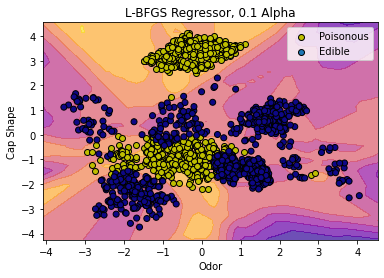

In [31]:
feat1, feat2 = 'odor', 'cap-shape'

Y, X = df['class'], df[[feat1, feat2]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

clf = MLPRegressor(solver = 'lbfgs', alpha = 0.1, random_state = 1, max_iter = 5000)
clf.fit(x_train, y_train)

y_pred_test = clf.predict(x_test)
y_pred_test[y_pred_test <= 0.5] = 0
y_pred_test[y_pred_test > 0.5] = 1

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

x_min, x_max = X[feat1].min() - 0.5, X[feat1].max() + 0.5
y_min, y_max = X[feat2].min() - 0.5, X[feat2].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.get_cmap('plasma'), alpha = 0.7)

data_c = pd.DataFrame(x_test, columns = x_test.columns)
data_c['class'] = y_pred_test

poison = data_c[data_c['class'] == 1]
non_poison = data_c[data_c['class'] == 0]

plt.scatter(poison[feat1], poison[feat2], color= 'y', edgecolors='k', label='Poisonous')
plt.scatter(non_poison[feat1], non_poison[feat2], c = non_poison['class'], cmap = plt.cm.get_cmap('plasma'), edgecolors='k', label='Edible')
plt.xlabel('Odor')
plt.ylabel('Cap Shape')
plt.title('L-BFGS Regressor, 0.1 Alpha')
plt.legend()